Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 17 rows, 53 columns and 533 nonzeros
Model fingerprint: 0x35ca7e11
Coefficient statistics:
  Matrix range     [9e-06, 1e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 10 rows and 12 columns
Presolve time: 0.01s
Presolved: 7 rows, 41 columns, 231 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -3.4711484e+31   6.179787e+31   3.471148e+01      0s
      16    7.9715547e-01   0.000000e+00   0.000000e+00      0s

Solved in 16 iterations and 0.01 seconds (0.00 work units)
Optimal objective  7.971554694e-01


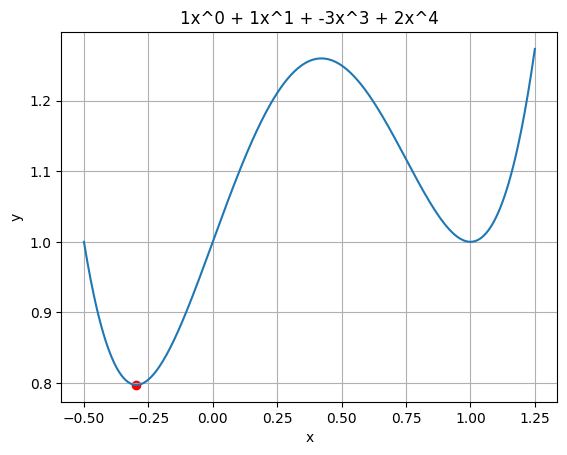

In [1]:
%matplotlib inline

import code

import numpy as np
import gurobipy as gp

# create the model
model = code.model.Model(
    n = 1, 
    k_half = 3, 
    k_upper = 7,
    socp = False,
)

# set the objective: 1 + x - 3x^3 + 2x^4
model.set_objective([
    (1, [0]),
    (1, [1]),
    (-3, [3]),
    (2, [4]),
])

model.optimize(100)

model.plot([-0.5,1.25])

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 33 rows, 269 columns and 3805 nonzeros
Model fingerprint: 0x9f62e86b
Coefficient statistics:
  Matrix range     [2e-06, 1e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 14 rows and 10 columns
Presolve time: 0.01s
Presolved: 19 rows, 259 columns, 2275 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
     109    1.0000823e+00   0.000000e+00   0.000000e+00      0s

Solved in 109 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.000082336e+00


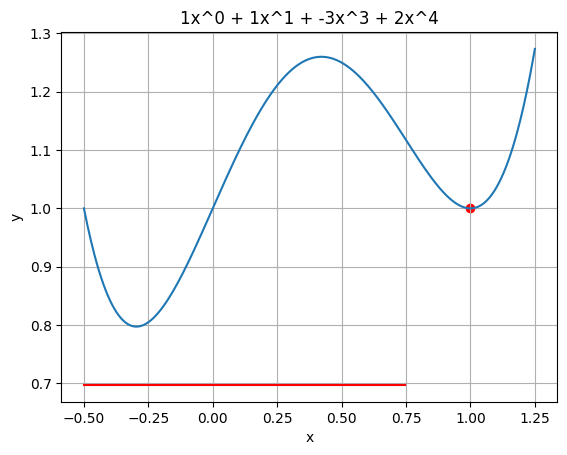

In [2]:
# add a constraint: x >= 0.75
model.add_cone(
    'x - 0.75 >= 0', 
    localizer = [
        (-0.75, [0]),
        (1, [1])
    ],
    inequality = True,
    socp = False,
)

model.optimize(100)

model.plot([-0.5,1.25])